## Build Models To Compare Features: Cleaned Original Features

### Read In Data

In [3]:
# Read in data
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline

train_features = pd.read_csv('../Data/Final_Data/train_features_original.csv')
train_labels = pd.read_csv('../Data/Final_Data/train_labels.csv')

train_features.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare_clean,Cabin,Embarked_clean
0,2,1,62.0,0,0,10.5000,147,3
1,3,1,8.0,4,1,29.1250,147,2
2,3,1,32.0,0,0,56.4958,147,3
3,3,0,20.0,1,0,9.8250,147,3
4,2,0,28.0,0,0,13.0000,147,3


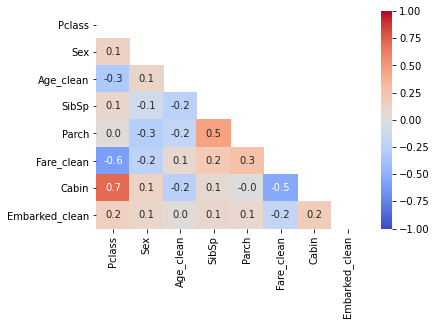

In [4]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

### GridSearchCV

In [8]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    mean = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(mean, stds, results.cv_results_['params']):
        print('{} (+/- {}) for {}'.format(mean, std, params))

In [9]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None],
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.7959795450537824 (+/- 0.056858584742651576) for {'max_depth': 2, 'n_estimators': 8}
0.7809557397284429 (+/- 0.05637698326210465) for {'max_depth': 2, 'n_estimators': 16}
0.7865808499382825 (+/- 0.04083661707580465) for {'max_depth': 2, 'n_estimators': 32}
0.786563216363957 (+/- 0.04612163757091486) for {'max_depth': 2, 'n_estimators': 64}
0.7847469582084289 (+/- 0.05221883453635779) for {'max_depth': 2, 'n_estimators': 128}
0.7978134367836361 (+/- 0.05220283799606172) for {'max_depth': 2, 'n_estimators': 256}
0.7978134367836359 (+/- 0.05084669210793709) for {'max_depth': 2, 'n_estimators': 512}
0.8165402927173337 (+/- 0.03449887930275888) for {'max_depth': 4, 'n_estimators': 8}
0.816540292717334 (+/- 0.059715375022262575) for {'max_depth': 4, 'n_estimators': 16}
0.8221654029271732 (+/- 0.04960917118576847) for {'max_depth': 4, 'n_estimators': 32}
0.8053429730206313 (+/- 0.053715884875142936) for {'max_depth': 4, 'n_estimators': 64}


### Feature Importance

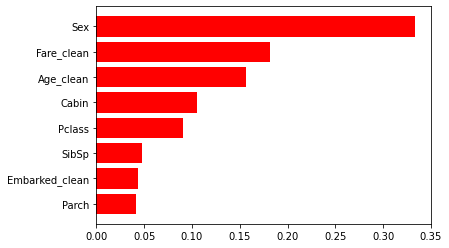

In [11]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [12]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../Pickled_Models/mdl_cleaned_original_features.pkl')

['../Pickled_Models/mdl_cleaned_original_features.pkl']